In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [24]:
columns=['fLength','fWidth','fSize','FConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv("magic04.data",names=columns)
df.head()

,fLength,fWidth,fSize,FConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [28]:
df['class'].unique()

array([1, 0])

In [26]:
df['class']=(df['class']=='g').astype(int)

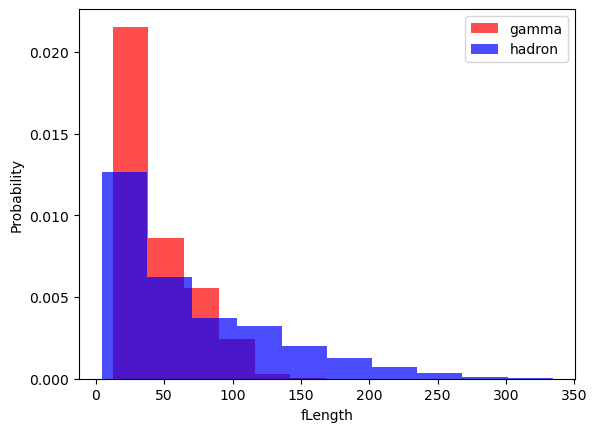

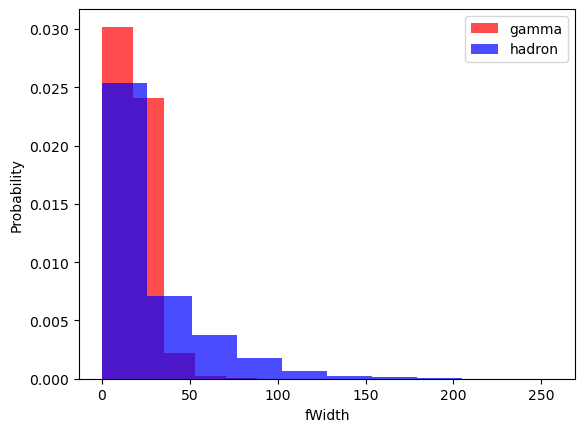

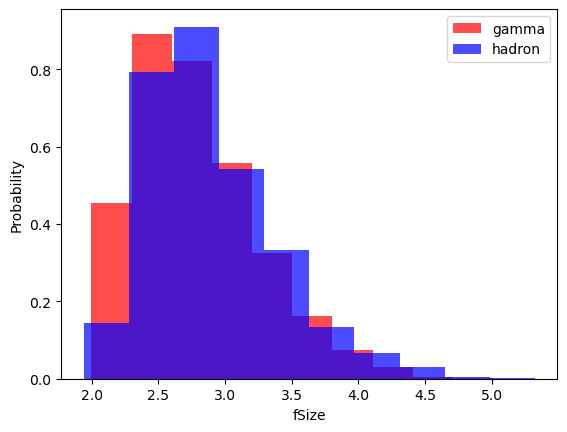

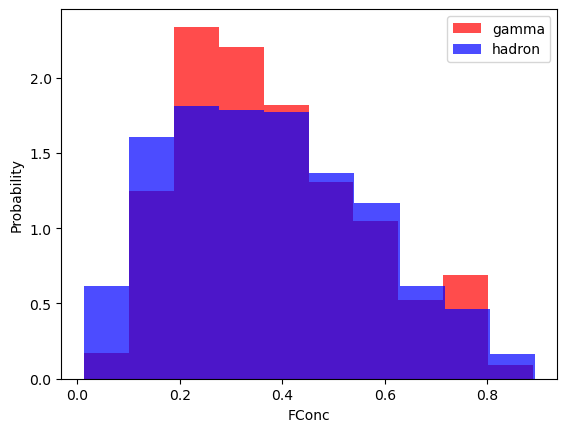

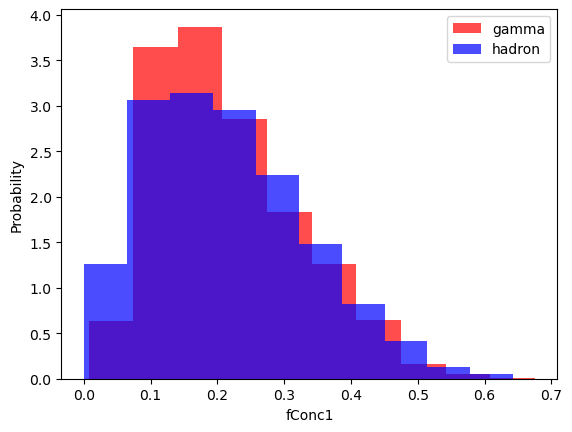

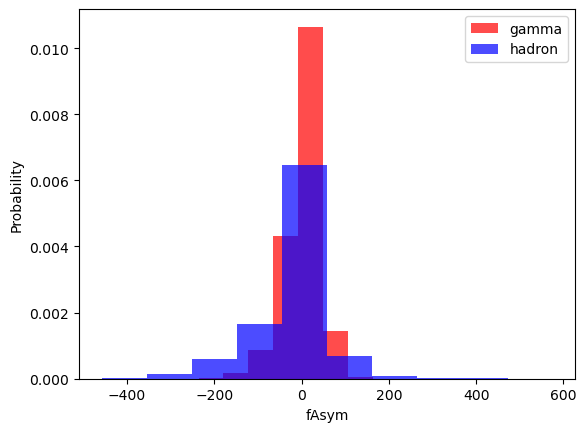

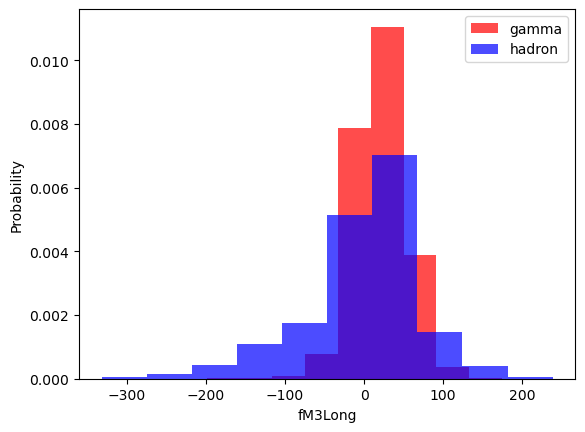

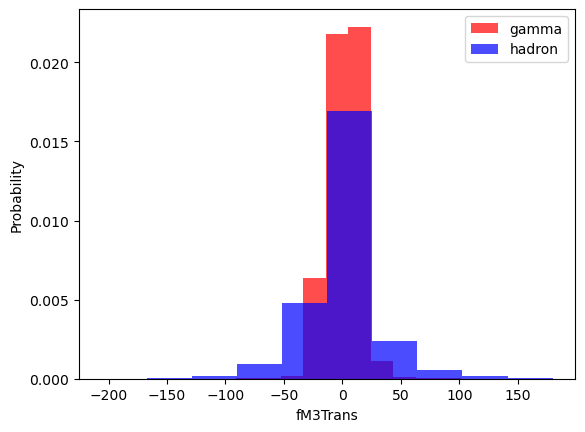

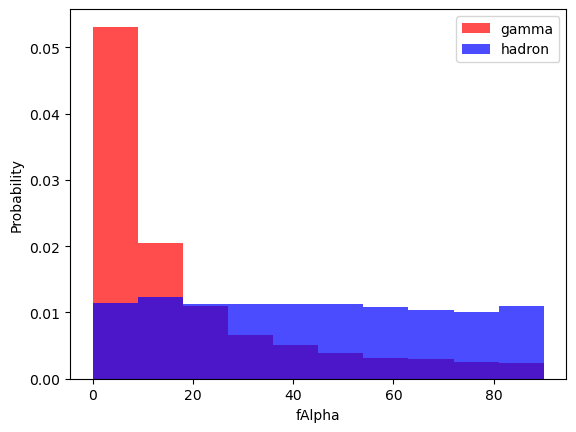

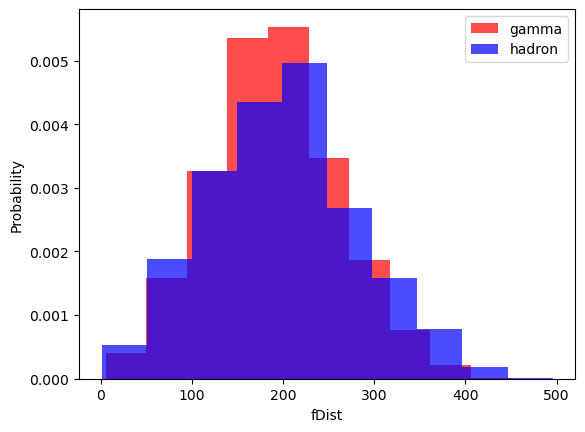

In [37]:
for label in columns[:-1]:
    plt.hist(df[df['class']==1][label],color='red',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label],color='blue',label='hadron',alpha=0.7,density=True)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Valid, Test datasets

In [40]:
# Step 1: Split into training and temporary sets
train_set, temp_set = train_test_split(df, test_size=0.4, random_state=42)

# Step 2: Split the temporary set into validation and test sets
valid_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)
# Output the sizes of each set
print(f"Training set size: {len(train_set)}")
print(f"Validation set size: {len(valid_set)}")
print(f"Test set size: {len(test_set)}")

Training set size: 11412
Validation set size: 3804
Test set size: 3804


In [45]:
#Standard Scaler
X=df.drop('class',axis=1)
y=df['class']
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [46]:
# Step 1: Split into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split the temporary set into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Output the sizes of each set
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_valid.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 11412
Validation set size: 3804
Test set size: 3804


# KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [86]:
y_pred_knn=knn_model.predict(X_test)

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.60      0.67      1317
           1       0.81      0.90      0.85      2487

    accuracy                           0.80      3804
   macro avg       0.79      0.75      0.76      3804
weighted avg       0.80      0.80      0.79      3804



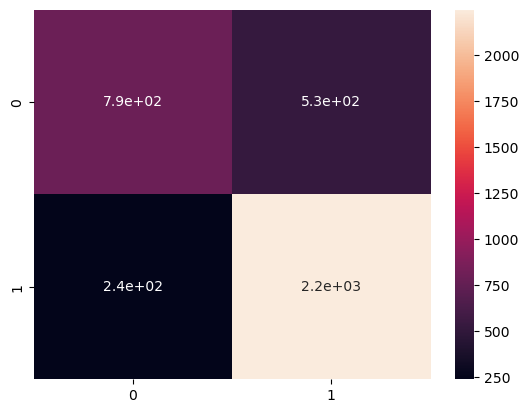

In [89]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(data=confusion_matrix(y_test,y_pred_knn),annot=True)
plt.show()

k=1
precision    recall  f1-score   support

           0       0.71      0.65      0.68      1317
           1       0.82      0.86      0.84      2487

    accuracy                           0.79      3804
   macro avg       0.77      0.75      0.76      3804
weighted avg       0.78      0.79      0.79      3804
k=11

 precision    recall  f1-score   support

           0       0.85      0.58      0.69      1317
           1       0.81      0.95      0.87      2487

    accuracy                           0.82      3804
   macro avg       0.83      0.76      0.78      3804
weighted avg       0.82      0.82      0.81      3804


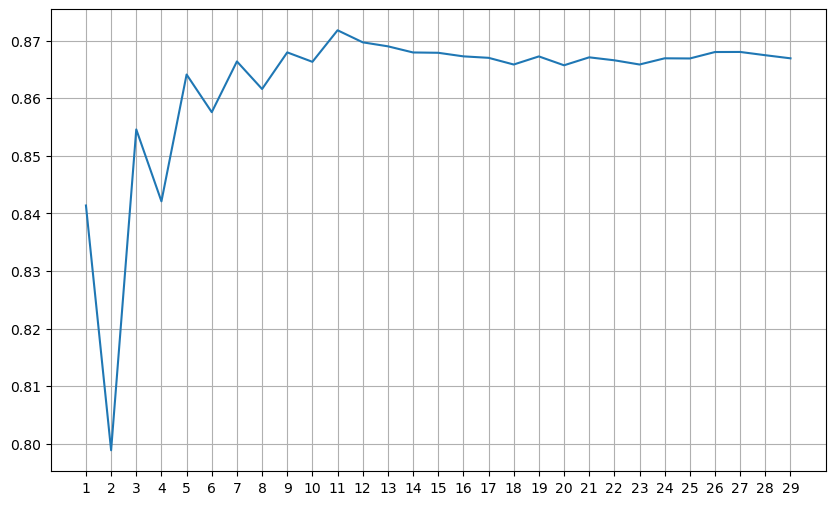

In [78]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

f1=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predict=knn.predict(X_test)
    
    f1.append(f1_score(y_test,y_predict))
plt.figure(figsize=(10,6))
plt.plot(range(1,30),f1)
plt.xticks(range(1,30))
plt.grid()
plt.show()

In [75]:
#Anothet method to find best k 
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,25)}
knn_gsv=GridSearchCV(knn_model,param_grid,cv=5)
knn_gsv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [76]:
knn_gsv.cv_results_

{'mean_fit_time': array([0.00602851, 0.00400639, 0.00401521, 0.00447841, 0.00413141,
        0.00392141, 0.00391245, 0.00389581, 0.00389547, 0.00390344,
        0.00390124, 0.00391111, 0.00406709, 0.00401149, 0.00400686,
        0.0039999 , 0.00398684, 0.00399699, 0.0040071 , 0.00401058,
        0.00400214, 0.00397797, 0.00397687, 0.00410376]),
 'std_fit_time': array([4.01247043e-03, 2.79542098e-05, 2.72795033e-05, 2.77079992e-04,
        3.30903399e-04, 1.85247400e-05, 2.50931449e-05, 1.78679734e-05,
        1.85950596e-05, 6.26709891e-06, 7.95475291e-06, 2.35069596e-05,
        1.55949270e-04, 2.39168894e-05, 1.72361958e-05, 2.36899304e-05,
        1.36936142e-05, 2.21267856e-05, 2.02709079e-05, 2.20557676e-05,
        2.33384390e-05, 3.97389920e-05, 4.56421593e-05, 1.61727855e-04]),
 'mean_score_time': array([0.06113853, 0.06268272, 0.06701193, 0.0742218 , 0.07201214,
        0.07458577, 0.07573085, 0.07713499, 0.07879329, 0.08031583,
        0.08186846, 0.08339734, 0.08530359, 0.08

In [77]:
knn_gsv.best_params_

{'n_neighbors': 13}

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)


/Users/mak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_lr=lr_model.predict(X_test)


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.58      0.66      1317
           1       0.80      0.90      0.85      2487

    accuracy                           0.79      3804
   macro avg       0.78      0.74      0.75      3804
weighted avg       0.78      0.79      0.78      3804



<Axes: >

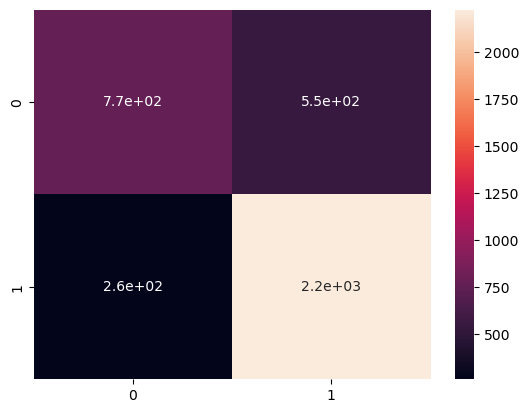

In [92]:
sns.heatmap(data=confusion_matrix(y_test,y_pred_lr),annot=True)

# Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)


GaussianNB()

In [96]:
y_pred_nb=nb_model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.71      0.37      0.48      1317
           1       0.73      0.92      0.82      2487

    accuracy                           0.73      3804
   macro avg       0.72      0.64      0.65      3804
weighted avg       0.73      0.73      0.70      3804



# Support Vektor Machine(SVM)


In [98]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)


SVC()

In [100]:
y_pred_svc=svc_model.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70      1317
           1       0.81      0.96      0.88      2487

    accuracy                           0.83      3804
   macro avg       0.85      0.77      0.79      3804
weighted avg       0.84      0.83      0.82      3804



In [102]:
print(f"Logistic Regression's Accuracy:{accuracy_score(y_test,y_pred_lr)}")
print(f"KNN's Accuracy:{accuracy_score(y_test,y_pred_knn)}")
print(f"Naive Bayes's Accuracy:{accuracy_score(y_test,y_pred_nb)}")
print(f"SVM's Accuracy:{accuracy_score(y_test,y_pred_svc)}")


Logistic Regression's Accuracy:0.788117770767613
KNN's Accuracy:0.7988958990536278
Naive Bayes's Accuracy:0.7294952681388013
SVM's Accuracy:0.8280757097791798
